In [ ]:
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 
=== For my_movies.csv Data

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# conda install -c conda-forge mlxtend

In [5]:
movie=pd.read_csv("my_movies.csv")
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [ ]:
# Data Preprocessing

In [10]:
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [7]:
movie.shape

(10, 15)

In [8]:
movie.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [11]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Drop first V1,V2,V3,V4 and V5 as it is not useful
movie1= movie.iloc[:,6:]

In [13]:
movie1

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [15]:
movie1.shape

(10, 9)

In [14]:
movie1.info()
# No empty field or null value or missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gladiator      10 non-null     int64
 1   LOTR1          10 non-null     int64
 2   Harry Potter1  10 non-null     int64
 3   Patriot        10 non-null     int64
 4   LOTR2          10 non-null     int64
 5   Harry Potter2  10 non-null     int64
 6   LOTR           10 non-null     int64
 7   Braveheart     10 non-null     int64
 8   Green Mile     10 non-null     int64
dtypes: int64(9)
memory usage: 848.0 bytes


In [16]:
movie1.dropna()

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


In [17]:
movie1.shape

(10, 9)

In [18]:
df=pd.get_dummies(movie1)
df

,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,0,1,1,0,1,0,0,0,1
1,1,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0
6,0,0,1,0,0,1,0,0,0
7,1,0,0,1,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0
9,1,0,0,0,0,0,1,0,1


Apply Apriori Algorithm

In [ ]:
#Apriori Algorithm Observation: Min support =0.1 for this 28 frequent item list is formed 
#Min support= 0.15 for this 7 frequent item list is formed

In [19]:
frequent_itemsets = apriori(movie1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.1,(Harry Potter2)
6,0.1,(LOTR)
7,0.1,(Braveheart)
8,0.2,(Green Mile)
9,0.6,"(Gladiator, Patriot)"


In [20]:
# Form the rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
...,...,...,...,...,...,...,...,...,...
71,"(Green Mile, Harry Potter1)","(LOTR2, LOTR1)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
72,(LOTR2),"(LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
73,(LOTR1),"(LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
74,(Green Mile),"(LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [21]:
rules.sort_values('lift',ascending = False)[0:20]
# These all are actionable rules as lift ratio is greater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(LOTR),"(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
70,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
69,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
68,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
67,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
75,(Harry Potter1),"(LOTR2, LOTR1, Green Mile)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
56,"(LOTR2, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.0,5.0,0.08,inf
54,(LOTR1),"(LOTR2, Green Mile)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
53,(LOTR2),"(LOTR1, Green Mile)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


In [22]:
rules[rules.lift>1]
# These all are actionable rules as lift ratio is greater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.80
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
4,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05
...,...,...,...,...,...,...,...,...,...
71,"(Green Mile, Harry Potter1)","(LOTR2, LOTR1)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
72,(LOTR2),"(LOTR1, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
73,(LOTR1),"(LOTR2, Green Mile, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
74,(Green Mile),"(LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [ ]:
#Association Rules for min_support=0.15,for this 7 frequent item list is formed

In [23]:
frequent_itemsets1 = apriori(movie1, min_support=0.15, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.7,(Gladiator)
1,0.2,(LOTR1)
2,0.2,(Harry Potter1)
3,0.6,(Patriot)
4,0.2,(LOTR2)
5,0.2,(Green Mile)
6,0.6,"(Gladiator, Patriot)"
7,0.2,"(LOTR2, LOTR1)"


In [24]:
# Form the rules
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.7)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [27]:
rules1.sort_values('lift',ascending = False)[0:20]
# These all are actionable rules as lift ratio is greater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


In [25]:
rules1[rules1.lift>1]
# These all are actionable rules as lift ratio is greater than 1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
3,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


In [ ]:
#Visual representation using heatmap for min_support=0.1
#Heatmaps help us understand a large number of rules between a small number of antecedents and consequents

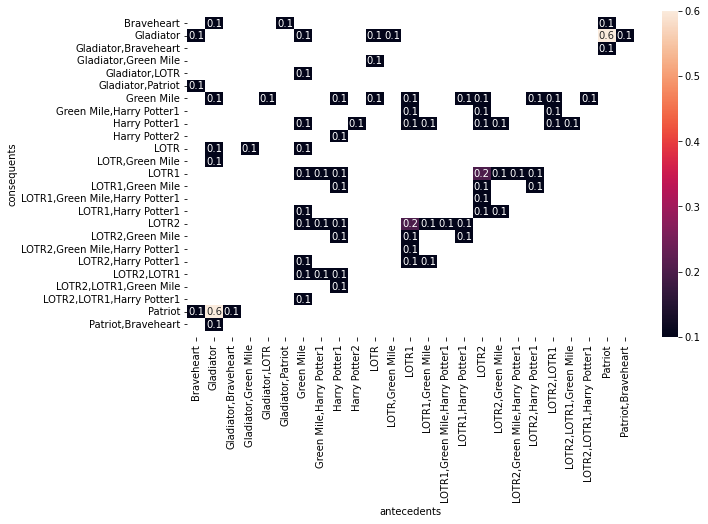

In [28]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show()

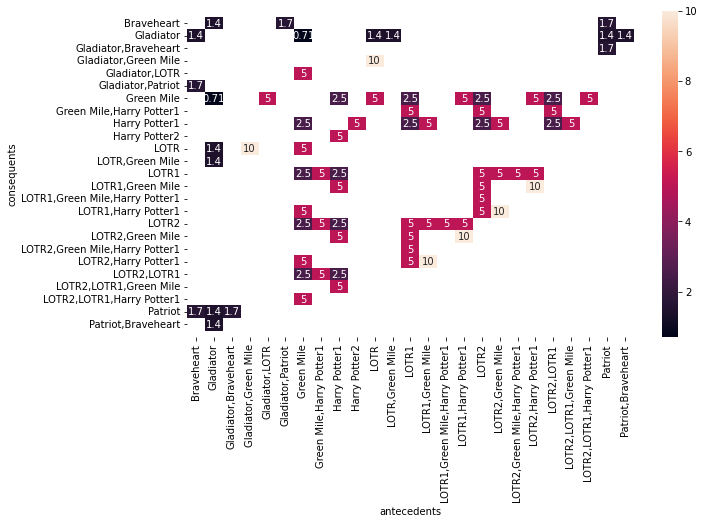

In [29]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar on
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Visual representation using heatmap for min_support=0.15

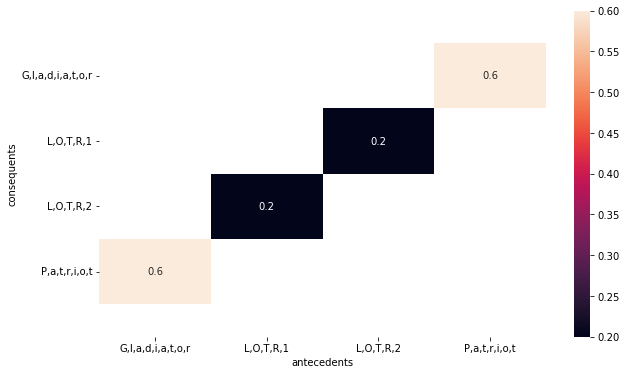

In [32]:
# Convert antecedents and consequents into strings
rules1['antecedents'] = rules1['antecedents'].apply(lambda a: ','.join(list(a)))
rules1['consequents'] = rules1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules1.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

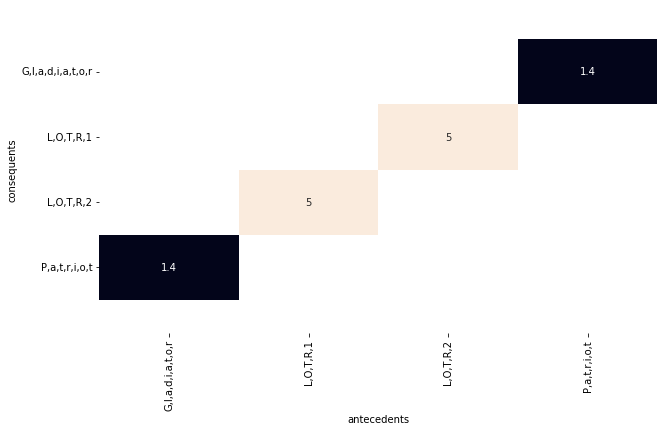

In [33]:
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules1.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()